# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv('train.csv')

In [20]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [21]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [22]:
print('train: \n\n', train.isnull().sum(axis = 0))
print('\ntest: \n\n', test.isnull().sum(axis = 0))

train: 

 id             0
keyword       44
location    1760
text           0
target         0
dtype: int64

test: 

 id            0
keyword      17
location    773
text          0
target        0
dtype: int64


In [23]:
di_train = train.drop(labels = 'id', axis = 1, inplace = False)
di_test = test.drop(labels = 'id', axis = 1, inplace = False)

In [24]:
# Заменяем на пустые строки NaN в категориальных
test_fixed = di_test.fillna("")
train_fixed = di_train.fillna("")

# Контрольный
print('Пропусков в тренировочной:', train_fixed.isnull().any().sum(axis = 0))
print('Пропусков в тестовой:', test_fixed.isnull().any().sum(axis = 0))

Пропусков в тренировочной: 0
Пропусков в тестовой: 0


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [25]:
round(train_fixed.groupby('target').size() / len(train_fixed) * 100, 3)

target
0    56.746
1    43.254
dtype: float64

In [26]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
round(train_fixed.groupby(['target']).size() / len(train_fixed) * 100, 3)

target
0    56.746
1    43.254
dtype: float64

In [29]:
s = train_fixed['keyword'].value_counts().head(10).index
l = train_fixed.groupby(['keyword', 'target']).size()

null = []
one = []
for i in range(1, len(l[s]), 2):
    null.append(l[s][i - 1])
    one.append(l[s][i])
    
lk = list(s)
lk.pop(3)
print(lk)
print(null)
print(one)

['', 'damage', 'siren', 'fatalities', 'deluge', 'refugees', 'derail', 'fear', 'tsunami']
[12, 19, 31, 34, 16, 5, 17, 15, 3]
[32, 17, 4, 17, 26, 13, 15, 27, 20]


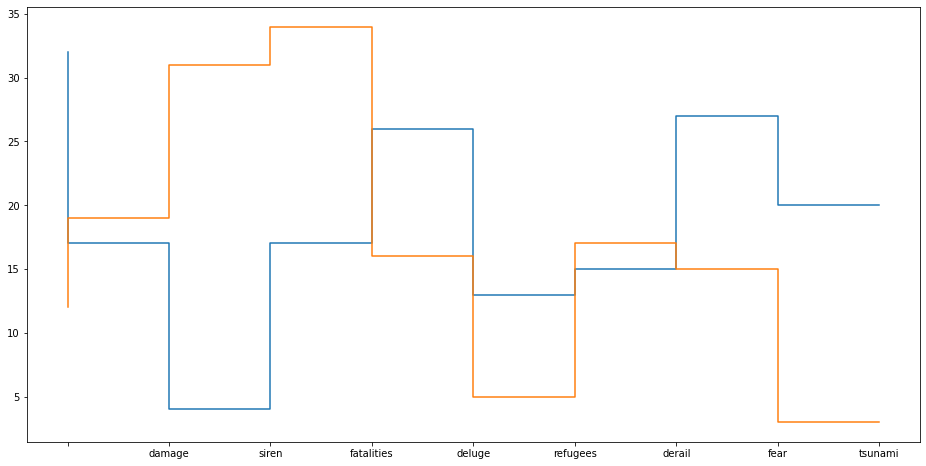

In [30]:
most_popular_keywords = plt.figure(figsize=(16, 8))

plt.step(lk, one)
plt.step(lk, null)

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [31]:
# Cтолбец с индексом убрал еще в задании 1 

train_fixed["keyword_location_text"] = train_fixed["keyword"].astype(str) + " " + train_fixed["location"].astype(str) + " " + train_fixed["text"].astype(str)
train = train_fixed.drop(labels = ['keyword', 'location', 'text'], axis = 1, inplace = False)

train

,target,keyword_location_text
1186,0,bridge%20collapse Ashes 2015: AustraliaÛªs c...
4071,1,"hail Carol Stream, Illinois GREAT MICHIGAN TEC..."
5461,1,police Houston CNN: Tennessee movie theater s...
5787,1,rioting Still rioting in a couple of hours le...
7445,0,wounds Lake Highlands Crack in the path where ...
...,...,...
5226,0,obliteration Merica! @Eganator2000 There aren'...
5390,0,panic just had a panic attack bc I don't have...
860,0,blood Omron HEM-712C Automatic Blood Pressure...
7603,1,Officials say a quarantine is in place at an...


In [94]:
test_fixed["keyword_location_text"] = test_fixed["keyword"].astype(str) + " " + test_fixed["location"].astype(str) + " " + test_fixed["text"].astype(str)
test = test_fixed.drop(labels = ['keyword', 'location', 'text'], axis = 1, inplace = False)

test

,target,keyword_location_text
2644,1,destruction So you have a new weapon that can...
2227,0,deluge The f$&amp;@ing things I do for #GISHW...
5448,1,police UK DT @georgegalloway: RT @Galloway4May...
132,0,aftershock Aftershock back to school kick off...
6845,0,"trauma Montgomery County, MD in response to tr..."
...,...,...
4307,0,"hellfire 570 Vanderbilt; Brooklyn, NY New cock..."
3375,1,evacuation USA Bend Post Office roofers cut ga...
1710,1,collided Monsoon flooding - Monsoon rains hav...
4898,1,massacre Ireland Remember this was a massacre ...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train['keyword_location_text'])

#print(vectorizer.get_feature_names())

#print(vectorizer.vocabulary_)
print('Размер матрицы: ', X.toarray().shape)

Размер матрицы:  (5329, 18455)


## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [34]:
import re

In [54]:
first = []
second = []
fird = []
dic = vectorizer.vocabulary_

for i in dic:
    if any(map(str.isdigit, i)):
        first.append(i)
    elif not bool(re.match("""^[a-zA-Z][a-z0-9 !?:;"'.,]+$""", i)):
        second.append(i)
    elif i.startswith('#') or i.startswith('@'):
        fird.append(i)
    
print('Все слова с цифрами:', len(first))
print('Все слова с символами пунктуации:', len(second))
print('Осталось хэштегов и упоминаний:', len(fird))

Все слова с цифрами: 3812
Все слова с символами пунктуации: 380
Осталось хэштегов и упоминаний: 0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [55]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

cnt = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
cnt.fit_transform(train['keyword_location_text'])

<5329x19670 sparse matrix of type '<class 'numpy.int64'>'
	with 94563 stored elements in Compressed Sparse Row format>

In [56]:
first = []
second = []
fird = []

for i in list(cnt.vocabulary_):
    if any(map(str.isdigit, i)):
        first.append(i)
    elif not bool(re.match("""^[a-zA-Z][a-z0-9 !?:;"'.,]+$""", i)):
        second.append(i)
    elif i.startswith('#') or i.startswith('@'):
        fird.append(i)

In [57]:
print('Все слова с цифрами:', len(first))
print('Все слова с символами пунктуации:', len(second))
print('Осталось хэштегов и упоминаний:', len(fird))

Все слова с цифрами: 3939
Все слова с символами пунктуации: 3840
Осталось хэштегов и упоминаний: 0


## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [60]:
import nltk

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Xom9K\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
def tknz(text):
    
    for i in text:
        i = i.lower()
        
    cnt_c = TweetTokenizer().tokenize(text)
    vc = []
    
    for i in cnt_c:
        if re.findall('[^a-z]', i) != []:
            if ((re.findall('[^\()!"\-;:,\.\?]', i) == []) and (re.findall('[\()]+', i) != []) and (re.findall('[!"\-;:,\.\?]+', i) != [])) or (re.findall('#[a-z\.]+', i) != []):
                vc.append(i)
        else:
            vc.append(i)
            
        if (i in stopwords.words('english')) and (i in vc):
            vc.remove(i)
            
    stmr = SnowballStemmer('english')
    vc = [stmr.stem(i) for i in vc]
    
    return vc

In [88]:
cnt_c = CountVectorizer(tokenizer = tknz)
cnt_c.fit_transform(train['keyword_location_text'])

print(len(list(cnt_vec_c.vocabulary_)))

10572


In [90]:
cnt_c = CountVectorizer(tokenizer = tknz)
cnt_c.fit_transform(train['keyword_location_text'].head(10))

print(list(cnt_vec_c.vocabulary_))

['bridg', 'ash', 'australia', 'collaps', 'trent', 'among', 'worst', 'histori', 'england', 'bundl', 'hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon', 'polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'riot', 'still', 'coupl', 'hour', 'left', 'class', 'wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'elbow', 'right', 'knee', 'airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', '#mlb', 'bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast', 'burn', 'except', 'idk', 'realli', 'destroy', 'ask', 'hous', 'maracay', 'nirgua', 'venezuela', 'offic', 'dead', 'exchang', 'shot', 'wreck', 'current', 'write', 'book', 'friggin', 'destiel', 'suck', 'read', 'vine', 'descript', 'mudslid', 'malibu', 'santaf', 'win'

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [95]:
cnt_reg = CountVectorizer(tokenizer = tknz)
bow = cnt_reg.fit_transform(train['keyword_location_text'])
bow_test = cnt_reg.transform(test['keyword_location_text'])

In [96]:
clf = LogisticRegression(random_state=1)
clf.fit(bow, train['target'])

LogisticRegression(random_state=1)

In [98]:
print('f1:', f1_score(test['target'], clf.predict(bow_test)))

f1: 0.752953813104189


## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(tokenizer = tknz)
bow_1 = tfidf.fit_transform(train['keyword_location_text'])

bow_1_test = tfidf.transform(test['keyword_location_text'])

In [ ]:
clf_idf = LogisticRegression(random_state = 1)
clf_idf.fit(bow_1, train['keyword_location_text'])

In [ ]:
print('f1:', f1_score(test['keyword_location_text'], clf_td_idf.predict(bow_1_test)))

In [ ]:
tfidf_2 = TfidfVectorizer(max_df=0.9, tokenizer = tknz)
bow_2 = tfidf.fit_transform(train['keyword_location_text'])

bow_2_test = tfidf.transform(test['keyword_location_text'])

In [ ]:
clf_idf_2 = LogisticRegression(random_state = 1)
clf_idf_2.fit(bow_2, train['keyword_location_text'])

In [ ]:
print('f1:', f1_score(test['keyword_location_text'], clf_td_idf.predict(bow_2_test)))

In [ ]:
tfidf_3 = TfidfVectorizer(max_df=0.9, min_df=0.001, tokenizer = tknz)
bow_3 = tfidf.fit_transform(train['keyword_location_text'])

bow_3_test = tfidf.transform(test['keyword_location_text'])

In [ ]:
clf_idf_3 = LogisticRegression(random_state = 1)
clf_idf_3.fit(bow_3, train['keyword_location_text'])

In [ ]:
print('f1:', f1_score(test['keyword_location_text'], clf_td_idf.predict(bow_3_test)))

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.